In [1]:
import json
import pandas as pd
import Levenshtein as lv
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def measure_time_distance(timedelta):
    """
    Function that convert timedelta into seconds
    """
    distance = (timedelta.total_seconds())
    return distance

def measure_text_distance(x,y):
    """
    Function that calculate the Levenshtein distance
    between two submissions code.
    https://en.wikipedia.org/wiki/Levenshtein_distance
    """
    return lv.distance(x,y)

def calculate_distribution(df, column_name, exercise, mean=True):
    """
    df: Dataframe with submissions
    column_name: column with status

    Function to obtain distribution of submissions status
    return metrics and amount of submissions
    """
    total_amount_submissions = df.shape[0]
    submissions_grouped = df.groupby([column_name]).size()
    metrics = {}
    if mean:
        metrics = submissions_grouped/total_amount_submissions
    else:
        metrics = submissions_grouped
    metrics['exercise'] = str(exercise)
    metrics['submission_amount'] = total_amount_submissions
    return metrics

def shift_columns(df, shift_exercise=False):
    """
    Function that create 4 new columns
    shifted column contains submissions_content shifted to calculate the distance
    datetime_shifted contains datetime shifted to calculate the distance between times
    
    distance, Levenshtein distance between submissions
    time_dist, time distance between submissions in seconds
    """
    df.loc[:,'shifted'] = df['content'].shift().fillna(value='')
    df.loc[:,'datetime_shifted'] = df['datetime'].shift().fillna(value=pd.Timestamp(1800, 1, 1, 0))
    df['distance'] = df.apply(lambda x : measure_text_distance(x['content'],x['shifted']), axis=1)
    df['time_dist'] = df.apply(lambda x : measure_time_distance(x['datetime']-x['datetime_shifted']), axis=1)
    if shift_exercise:
        df.loc[:,'exercise.name.previous'] = df['exercise.name'].shift().fillna(value='')
        df.loc[:,'submissions_status.previous'] = df['status'].shift().fillna(value='')
        df['switch_exercise'] = df.apply(lambda x : x['exercise.name'] != x['exercise.name.previous'], axis=1)
    return df

# Load Failed Submissions

In [ ]:
submissions_failed = pd.DataFrame()
dataset_home = "datasets/"
files = [
    'haskell_new.json'
]

for file in files:
    json_file = open(dataset_home+str(file), encoding='utf8')
    json_data = json.load(json_file)
    submissions_failed = pd.io.json.json_normalize(json_data)
    submissions_failed['datetime'] = pd.to_datetime(submissions_failed['created_at.$date'], unit='ms')

In [ ]:

submissions_failed = submissions_failed[['content', 'expectation_results', 'feedback', 'result', 'sid', 'status',
       'submissions_count', 'test_results', 'guide.slug', 'submitter.email',
       'submitter.social_id', 'guide.name', 'exercise.name', 'exercise.eid',
       'guide.language.name', 'datetime']]


# Load IntroAlgo Submissions

In [3]:
submissions_introAlgo = pd.DataFrame()
dataset_home = "datasets/"
files = [
    #'2016-2c-introalgo-2c-2016.json', '2017-2c-introalgo-2c-2017.json',
    '2018-2c-introalgo-2018-2c-23Octubre.json',
]

for file in files:
    json_file = open(dataset_home+str(file), encoding='utf8')
    json_data = json.load(json_file)
    
    subm_df = pd.io.json.json_normalize(
        json_data, 'submissions', [['guide','slug'], ['student','email'],['student','social_id'],['guide','name'], ['exercise','name'],['exercise','eid'],['guide','language','name'], ['created_at']], record_prefix='submissions_', errors='ignore')
    subm_df['datetime'] = pd.to_datetime(subm_df['submissions_created_at'])
    submissions_introAlgo = submissions_introAlgo.append(subm_df)
    

In [4]:
submissions_introAlgo.rename(columns={'submissions_content':'content',
       'submissions_expectation_results': 'expectation_results', 'submissions_feedback':'feedback',
       'submissions_result' : 'result', 'submissions_sid' : 'sid', 'submissions_status': 'status',
       'submissions_submissions_count':'submissions_count', 'submissions_test_results':'test_results',
       'student.email' : 'submitter.email', 'student.social_id':'submitter.social_id'}, inplace=True)

In [5]:
submissions_introAlgo = submissions_introAlgo.reset_index()[['content', 'expectation_results', 'feedback',
       'result', 'sid', 'status', 'submissions_count', 'test_results',
       'guide.slug', 'submitter.email', 'submitter.social_id', 'guide.name',
       'exercise.name', 'exercise.eid', 'guide.language.name', 'datetime']]

In [6]:
submissions_introAlgo

,content,expectation_results,feedback,result,sid,status,submissions_count,test_results,guide.slug,submitter.email,submitter.social_id,guide.name,exercise.name,exercise.eid,guide.language.name,datetime
0,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[],,\nsolucion.hs:27:25:\n parse error on input...,46fb6cbab2ed9e66,errored,0,[],introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:26:54.586
1,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[{'html': 'translation missing: es.expectation...,,\nsolucion.hs:25:21:\n Not in scope: ‘=<’\n...,e3cdb84007f23b35,errored,1,[],introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:27:52.994
2,minimoEntre :: Int -> Int -> Int\r\nminimoEntr...,[{'html': 'translation missing: es.expectation...,,,d1304cd0063b1428,passed,2,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,alecabralhillar@gmail.com,auth0|5b72d07095a53a2866933530,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-09-14 01:28:17.048
3,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,82db831cbc839fe5,failed,0,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:29:32.237
4,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,31a049e62760504f,failed,1,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:15.843
5,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,4fec2baa12f2bb9f,failed,2,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:27.428
6,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,fd955d1ea85ccb63,failed,3,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:40.268
7,"minimoEntre (x,y) | x < y = x\r\n ...",[],,\nsolucion.hs:27:1:\n parse error (possibly...,907812721a962549,errored,4,[],introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:30:48.366
8,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,f0db9a080cb6f7f1,failed,5,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:31:14.448
9,"minimoEntre (x,y) | x < y = x\r\n ...",[{'html': 'translation missing: es.expectation...,,,bbcb56275717b389,failed,6,"[{'title': 'minimoEntre 4 y 8 es 4', 'status':...",introalgo-unc/mumuki-guia-funcional-funciones-...,arnezdankevin@hotmail.com,auth0|5b7df200c2755e5251492c9f,Alternativas: Guardas y Patrones,Guardas: Básico,1,haskell,2018-08-23 23:31:35.861


# Load courses submissions

In [ ]:
dataset_home = "datasets/haskell"
files = os.listdir(dataset_home)
submissions_courses = pd.DataFrame()
for file in files:
    json_file = open(os.path.join(dataset_home, file), encoding='utf8')
    json_data = json.load(json_file)
    submissions_courses = submissions_courses.append(pd.io.json.json_normalize(json_data), ignore_index=True)

submissions_courses['datetime'] = pd.to_datetime(submissions_courses['created_at.$date'], unit='ms')
submissions_courses = submissions_courses[['content', 'expectation_results', 'feedback', 'result', 'sid', 'status',
   'submissions_count', 'test_results', 'guide.slug', 'submitter.email',
   'submitter.social_id', 'guide.name', 'exercise.name', 'exercise.eid',
   'guide.language.name', 'datetime']]


In [ ]:
submissions_df = pd.concat([submissions_introAlgo, submissions_courses, submissions_failed])

In [9]:
#base = 'dataframes_pkl/'
#submissions = pd.read_pickle(base + 'failed_submissions_df_FINAL.pkl')
submissions_df =  pd.read_pickle('dataframes_pkl/introAlgo_FINAL_anotado.pkl')
submissions_df

,content,guide.name,datetime,student.email,distance,time_dist,exercise.eid,exercise.name,submissions_status,submissions_count,...,PA,EA,PPA,PTT,PDL,IPA,PCSA,APE,CAPE,COMP
10106,"calcular:: (Int->Int)->(Int,Int) \r\ncalcular ...",Práctica Guardas y Pattern Matching,2018-10-04 13:39:07.149,elmaxisantillan@gmail.com,179,-4408620.426,407,calcular,failed,5,...,0.328431,0.217391,0.630350,66.566345,12.293333,0.580174,9.629630,0.642173,0.092652,0.931034
17822,"calcular:: (Int->Int)->(Int,Int) \r\ncalcular ...",Práctica Guardas y Pattern Matching,2018-10-04 13:37:47.721,elmaxisantillan@gmail.com,16,79.428,407,calcular,failed,4,...,0.328431,0.217391,0.630350,66.566345,12.293333,0.580174,9.629630,0.642173,0.092652,0.931034
17821,"calcular:: (Int->Int)->(Int,Int) \r\ncalcular ...",Práctica Guardas y Pattern Matching,2018-10-04 13:33:19.819,elmaxisantillan@gmail.com,83,267.902,407,calcular,failed,3,...,0.328431,0.217391,0.630350,66.566345,12.293333,0.580174,9.629630,0.642173,0.092652,0.931034
10203,"Másdos= (int,int)->int",Valores y Funciones,2018-10-02 01:45:04.469,nicosemiotica23@hotmail.com,21,-4189887.128,1101,Más composición,errored,33,...,0.750916,0.578947,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027
20843,Másdos==siguiente numero = 2 + numero,Valores y Funciones,2018-10-02 00:48:28.974,nicosemiotica23@hotmail.com,25,3395.495,1101,Más composición,errored,32,...,0.750916,0.578947,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027
20842,Másdos= 2 + (siguiente numero),Valores y Funciones,2018-10-02 00:47:45.104,nicosemiotica23@hotmail.com,19,43.870,1101,Más composición,errored,31,...,0.750916,0.578947,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027
20841,Másdos=2 + (siguiente numero),Valores y Funciones,2018-10-02 00:47:34.746,nicosemiotica23@hotmail.com,1,10.358,1101,Más composición,errored,30,...,0.750916,0.578947,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027
20840,Másdos=2 + numero,Valores y Funciones,2018-10-02 00:47:03.788,nicosemiotica23@hotmail.com,12,30.958,1101,Más composición,errored,29,...,0.750916,0.578947,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027
20839,siguiente=num a => a -> a -> a,Valores y Funciones,2018-10-02 00:45:48.623,nicosemiotica23@hotmail.com,27,75.165,1101,Más composición,errored,28,...,0.750916,0.578947,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027
20838,siguiente=(Número) +2,Valores y Funciones,2018-10-02 00:43:48.950,nicosemiotica23@hotmail.com,19,119.673,1101,Más composición,errored,27,...,0.750916,0.578947,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027


## Users logged in with social accounts.

In [10]:
social_accounts = submissions_df[submissions_df['submitter.email'].isnull()]['submitter.social_id'].nunique()

KeyError: 'submitter.email'

## Users logged in with email accounts.

In [13]:
email_accounts = submissions_df['student.email'].nunique()

In [14]:
exercises_social = 0
for social in social_accounts:
    exercises_social += submissions_df[submissions_df['student.email'] == social]['exercise.name'].nunique()

NameError: name 'social_accounts' is not defined

In [31]:
exercises_email = 0
for email in email_accounts:
    exercises_email += submissions_df[submissions_df['submitter.email'] == email]['exercise.name'].nunique()

In [44]:
submissions_df = submissions_df[submissions_df['guide.language.name'] == 'haskell']
submissions_df = submissions_df[~submissions_df['content'].isnull()]
submissions_df = submissions_df[~(submissions_df['status']=='aborted')]
exercises_names_2018 = ['Guardas: Básico', 'Otherwise', 'La historia sin fin',
       'No todo lo que brilla es Oro', 'Iterar', 'Variable Anónima',
       '¡Terminala! Parte 2', 'El caso base',
       'Pattern Matching con Tuplas', 'Orden de las Condiciones',
       'Cuando los patrones no encajan', 'esMultiploDeTres',
       'Pausa: Volvieron los tipos', 'esMultiploDe', 'Cubo',
       'Puntos Para Setenta!', 'Área', 'Tipando tuplas', 'esBisiesto',
       'celsiusToFahr', 'fahrToCelsius', 'haceFrioF', 'Los números',
       'fibonacci', 'pertenece', 'interseccion', 'transformadaLoca',
       'productoria', 'maximo', 'menoresA', 'diferencias', 'Dispersión',
       'sinRepetidos', 'Pinos', 'esCuadradoPerfecto', 'Días',
       'Valores y variables', 'siguiente', 'mitad', 'Inversa', 'Triple',
       'esNumeroPositivo', 'Más valores', 'Las Funciones',
       'elementos3-upla', 'aplicar2-upla', 'cuentaBizarra', 'notas',
       'notasFinales2-upla', 'esMayorDeEdad', 'calcular', 'Más funciones',
       'Los booleanos', 'Múltiples parámetros', 'Triángulos',
       'Combinando funciones', 'Composición', 'promedios',
       'promediosSinAplazos', 'Los operadores son funciones',
       'Más composición', 'alVesre', 'zipWith', 'filtrar', 'maximoSegun',
       'aplanar', 'intercalar']
#calculate_distribution()

In [45]:
submissions = pd.DataFrame()
for exercise_name in exercises_names_2018:
    submissions = submissions.append(submissions_df[submissions_df['exercise.name'] == exercise_name], ignore_index = True)

In [8]:
calculate_distribution(submissions, 'submissions_status', 'todes', False)

submissions_status
errored                  69249
failed                   86525
passed                   68107
passed_with_warnings     11821
exercise                 todes
submission_amount       235702
dtype: object

In [38]:
print("total users {}".format(social_accounts + email_accounts))

total users 3915


In [ ]:
submissions = submissions[~(submissions['status'] == 'aborted')]
submissions = submissions[~(submissions['status'] == 'pending')]
submissions = submissions[~(submissions['status'] == 'running')]
distribution = calculate_distribution(submissions, 'status', 'Exercises Distribution', False)
distribution

In [ ]:
submissions_df['exercise.name'].nunique()

In [99]:
base = 'dataframes_pkl/'
#submissions_df = pd.read_pickle(base+'failed_submissions_df.pkl')
submissions_df = pd.read_pickle('dataframes_pkl/introAlgo_FINAL_anotado.pkl')
#submissions_df = pd.read_pickle('dataframes_pkl/mumuki_io_FINAL_anotado.pkl')


# Calculo de uso de la plataforma

In [100]:
def calculate_day_and_hour_of_use(df):
    df['day_of_week'] = df['datetime'].apply(
        lambda x : x.isoweekday()
    )
    df['hour_of_day'] = df['datetime'].apply(
        lambda x : x.hour
    )
    return df

In [101]:
submissions = calculate_day_and_hour_of_use(submissions_df)
submissions

,content,guide.name,datetime,student.email,distance,time_dist,exercise.eid,exercise.name,submissions_status,submissions_count,...,PPA,PTT,PDL,IPA,PCSA,APE,CAPE,COMP,day_of_week,hour_of_day
10106,"calcular:: (Int->Int)->(Int,Int) \r\ncalcular ...",Práctica Guardas y Pattern Matching,2018-10-04 13:39:07.149,elmaxisantillan@gmail.com,179,-4408620.426,407,calcular,failed,5,...,0.630350,66.566345,12.293333,0.580174,9.629630,0.642173,0.092652,0.931034,4,13
17822,"calcular:: (Int->Int)->(Int,Int) \r\ncalcular ...",Práctica Guardas y Pattern Matching,2018-10-04 13:37:47.721,elmaxisantillan@gmail.com,16,79.428,407,calcular,failed,4,...,0.630350,66.566345,12.293333,0.580174,9.629630,0.642173,0.092652,0.931034,4,13
17821,"calcular:: (Int->Int)->(Int,Int) \r\ncalcular ...",Práctica Guardas y Pattern Matching,2018-10-04 13:33:19.819,elmaxisantillan@gmail.com,83,267.902,407,calcular,failed,3,...,0.630350,66.566345,12.293333,0.580174,9.629630,0.642173,0.092652,0.931034,4,13
10203,"Másdos= (int,int)->int",Valores y Funciones,2018-10-02 01:45:04.469,nicosemiotica23@hotmail.com,21,-4189887.128,1101,Más composición,errored,33,...,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027,2,1
20843,Másdos==siguiente numero = 2 + numero,Valores y Funciones,2018-10-02 00:48:28.974,nicosemiotica23@hotmail.com,25,3395.495,1101,Más composición,errored,32,...,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027,2,0
20842,Másdos= 2 + (siguiente numero),Valores y Funciones,2018-10-02 00:47:45.104,nicosemiotica23@hotmail.com,19,43.870,1101,Más composición,errored,31,...,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027,2,0
20841,Másdos=2 + (siguiente numero),Valores y Funciones,2018-10-02 00:47:34.746,nicosemiotica23@hotmail.com,1,10.358,1101,Más composición,errored,30,...,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027,2,0
20840,Másdos=2 + numero,Valores y Funciones,2018-10-02 00:47:03.788,nicosemiotica23@hotmail.com,12,30.958,1101,Más composición,errored,29,...,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027,2,0
20839,siguiente=num a => a -> a -> a,Valores y Funciones,2018-10-02 00:45:48.623,nicosemiotica23@hotmail.com,27,75.165,1101,Más composición,errored,28,...,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027,2,0
20838,siguiente=(Número) +2,Valores y Funciones,2018-10-02 00:43:48.950,nicosemiotica23@hotmail.com,19,119.673,1101,Más composición,errored,27,...,0.779345,66.095601,15.731707,0.331085,4.013158,0.400452,0.167421,1.027027,2,0


In [102]:
submissions_per_day = submissions[
    ['datetime', 'day_of_week']].groupby('day_of_week').count().reset_index().rename(columns={'datetime':'amount_submissions'})

## soluciones por dia 1 Lunes 7 Domingo

In [103]:
submissions_per_day['percentage'] = submissions_per_day['amount_submissions']/submissions_per_day['amount_submissions'].sum()*100
submissions_per_day

,day_of_week,amount_submissions,percentage
0,1,1503,7.759021
1,2,7205,37.194776
2,3,2351,12.136699
3,4,5316,27.443085
4,5,1028,5.306902
5,6,962,4.966187
6,7,1006,5.193330


## soluciones por franja horaria martes y jueves

In [104]:
submissions_introAlgo = submissions
submissions_per_hour = submissions_introAlgo[
    (submissions_introAlgo['day_of_week'] == 4) | (submissions_introAlgo['day_of_week'] == 2)][['hour_of_day', 'datetime']].groupby('hour_of_day').count()

In [105]:
submissions_per_hour = submissions[['hour_of_day', 'datetime']].groupby('hour_of_day').count()

In [106]:
submissions_per_hour.sum()

datetime    19371
dtype: int64

In [107]:
submissions_per_hour = submissions_per_hour.reset_index().rename(columns={'datetime':'amount_submissions'})
submissions_per_hour.sort_values('hour_of_day', inplace=True)
submissions_per_hour.set_index('hour_of_day')
submissions_per_hour

,hour_of_day,amount_submissions
0,0,1019
1,1,855
2,2,493
3,3,395
4,4,358
5,5,208
6,6,164
7,7,67
8,8,86
9,9,77


In [108]:
print(submissions_per_hour.loc[0:3,:].sum())
print('-----------------')
print(submissions_per_hour.loc[0:3,:]['amount_submissions'].sum())

hour_of_day              6
amount_submissions    2762
dtype: int64
-----------------
2762


In [109]:
sub_0_3 = submissions_per_hour.loc[0:3,:]['amount_submissions'].sum()
sub_4_8 = submissions_per_hour.loc[4:8,:]['amount_submissions'].sum()
sub_9_13 = submissions_per_hour.loc[9:13,:]['amount_submissions'].sum()
sub_14_18 = submissions_per_hour.loc[14:18,:]['amount_submissions'].sum()
sub_19_23 = submissions_per_hour.loc[19:23,:]['amount_submissions'].sum()
lst_uso = [sub_0_3, sub_4_8, sub_9_13, sub_14_18, sub_19_23]
lst_uso

[2762, 883, 8629, 2252, 4845]

In [110]:
def plot_uso_por_horas(lst_uso):
    plt.gcf().clear()
    plt.style.use('seaborn')
    plt.figure(figsize=(15,10))
    plt.title("Intro Algo", size=30)
    plt.bar(
        ['0-3', '4-8', '9-13', '14-18', '19-23'],
        lst_uso, edgecolor='black', label='Cantidad de soluciones', width=0.5)
    plt.xlabel('Franja Horaria', size=24)
    #plt.ylabel('Cantidad de soluciones enviadas', size=24)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.legend(loc=2, prop={'size': 20})
    plt.show()


In [111]:
def plot_uso_semanal(df):
    plt.gcf().clear()
    plt.style.use('seaborn')
    plt.figure(figsize=(15,10))
    plt.title("Intro Algo", size=30)
    plt.bar(
        ['L', 'M', 'X', 'J', 'V', 'S', 'D'],
        df['amount_submissions'], edgecolor='black', label='Cantidad de soluciones', width=0.5)
        #(df['amount_submissions']/df['amount_submissions'].sum())*100, edgecolor='black', label='Submissions Amount')
    plt.xlabel('Dia de la semana', size=24)
    #plt.ylabel('Cantidad de soluciones enviadas', size=24)
    plt.yticks(fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.legend(loc=1, prop={'size': 20})
    plt.show()
    

<Figure size 576x396 with 0 Axes>

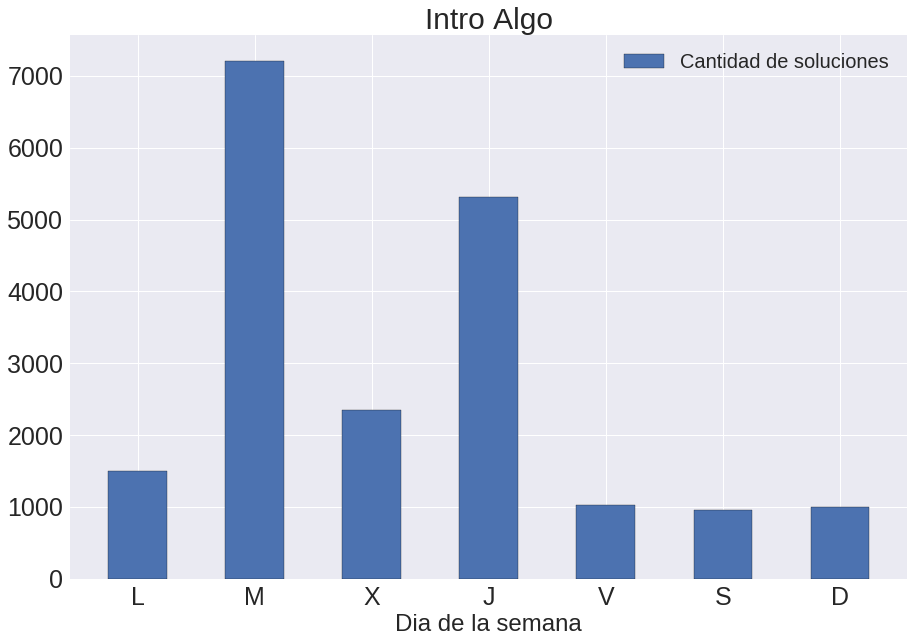

In [112]:
plot_uso_semanal(submissions_per_day)

<Figure size 576x396 with 0 Axes>

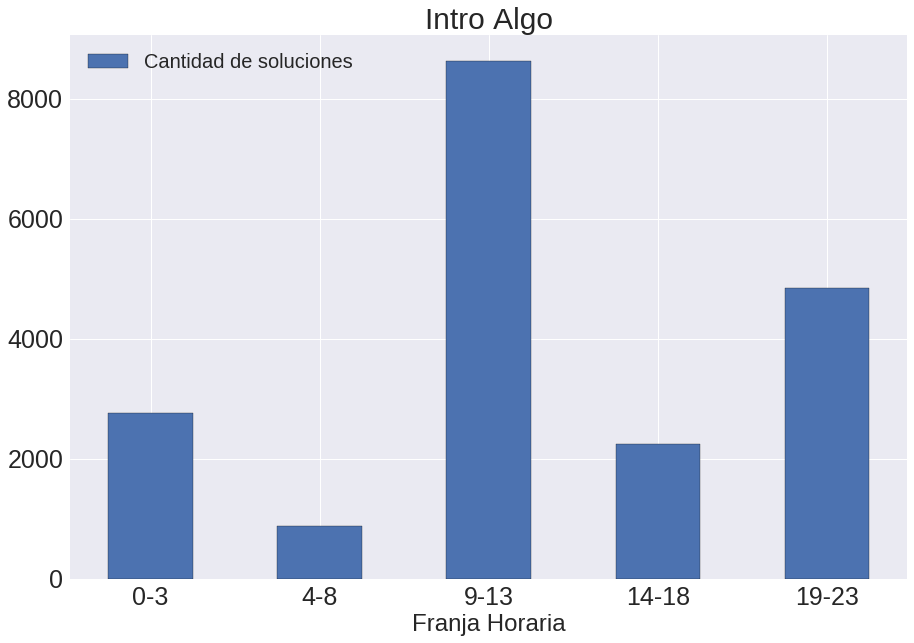

In [113]:
plot_uso_por_horas(lst_uso)